#Set up the notebook

In [83]:
# import required packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

<IPython.core.display.Javascript object>

In [2]:
# Avoids scroll-in-the-scroll in the entire Notebook
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

#Get the data and conduct basic exploration and transformation

In [3]:
# read in the data
df_dreams = pd.read_csv('Scary Dreams.csv')

<IPython.core.display.Javascript object>

In [4]:
df_dreams.head()

<IPython.core.display.Javascript object>

,Month,scary dreams: (United States)
0,2009-01,30
1,2009-02,23
2,2009-03,27
3,2009-04,8
4,2009-05,18


In [5]:
df_dreams.dtypes

<IPython.core.display.Javascript object>

Month                            object
scary dreams: (United States)     int64
dtype: object

In [6]:
df_dreams['Month'] = df_dreams['Month'].astype('datetime64[ns]')
df_dreams.dtypes
df_dreams['Month']
df_dreams

<IPython.core.display.Javascript object>

,Month,scary dreams: (United States)
0,2009-01-01,30
1,2009-02-01,23
2,2009-03-01,27
3,2009-04-01,8
4,2009-05-01,18
...,...,...
172,2023-05-01,68
173,2023-06-01,65
174,2023-07-01,61
175,2023-08-01,62


In [7]:
df_dreams['dreams'] = df_dreams['scary dreams: (United States)']
df_dreams = df_dreams.drop('scary dreams: (United States)', axis=1)
df_dreams.rename(columns = {'Month':'date'}, inplace = True)
df_dreams.head()

<IPython.core.display.Javascript object>

,date,dreams
0,2009-01-01,30
1,2009-02-01,23
2,2009-03-01,27
3,2009-04-01,8
4,2009-05-01,18


In [8]:
df_dreams['year'] = df_dreams['date'].dt.year
df_dreams['month'] = df_dreams['date'].dt.month
df_dreams.head()

<IPython.core.display.Javascript object>

,date,dreams,year,month
0,2009-01-01,30,2009,1
1,2009-02-01,23,2009,2
2,2009-03-01,27,2009,3
3,2009-04-01,8,2009,4
4,2009-05-01,18,2009,5


In [9]:
df_dreams = df_dreams[['date', 'year', 'month', 'dreams']]
df_dreams.dtypes

<IPython.core.display.Javascript object>

date      datetime64[ns]
year               int64
month              int64
dreams             int64
dtype: object

#Do some visualization and grouping to further explore the data

<IPython.core.display.Javascript object>

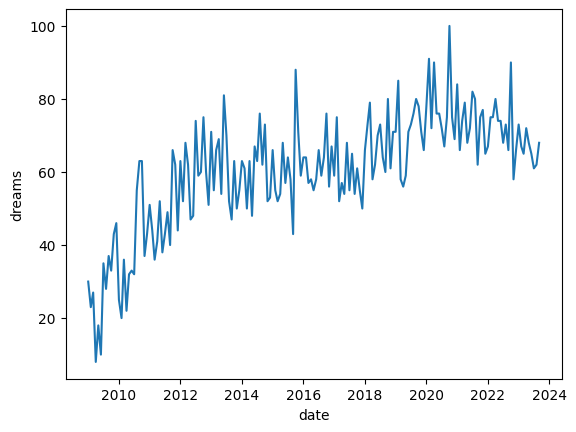

In [10]:
sns.lineplot(data=df_dreams, x='date', y='dreams');

In [11]:
dreams_min_max = df_dreams.groupby(['year', 'month'])['dreams'].sum().reset_index()
print("Year and month with the most dreams:\n", dreams_min_max[dreams_min_max['dreams']==dreams_min_max['dreams'].max()], "\n")
print("Year and month with the least dreams:\n", dreams_min_max[dreams_min_max['dreams']==dreams_min_max['dreams'].min()])

<IPython.core.display.Javascript object>

Year and month with the most dreams:
      year  month  dreams
141  2020     10     100 

Year and month with the least dreams:
    year  month  dreams
3  2009      4       8


In [12]:
dreams_monthly = df_dreams[['month', 'dreams']].groupby('month')['dreams'].sum().reset_index()
dreams_monthly

<IPython.core.display.Javascript object>

,month,dreams
0,1,931
1,2,906
2,3,867
3,4,869
4,5,835
5,6,888
6,7,931
7,8,923
8,9,881
9,10,1021


#The dataset is pretty simple so let's look at some interesting ways to present it

In [13]:
# how many dream counts are fibonacci numbers?
fibonacci_15 = [0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]

df_dreams_fib = pd.DataFrame(columns=['date', 'year', 'month', 'dreams'], index=df_dreams.index)

for i in df_dreams.index:
  if df_dreams['dreams'][i] in fibonacci_15:
    df_dreams_fib.date[i] = df_dreams.date[i]
    df_dreams_fib.year[i] = df_dreams.year[i]
    df_dreams_fib.month[i] = df_dreams.month[i]
    df_dreams_fib.dreams[i] = df_dreams.dreams[i]

df_dreams_fib = df_dreams_fib.dropna()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

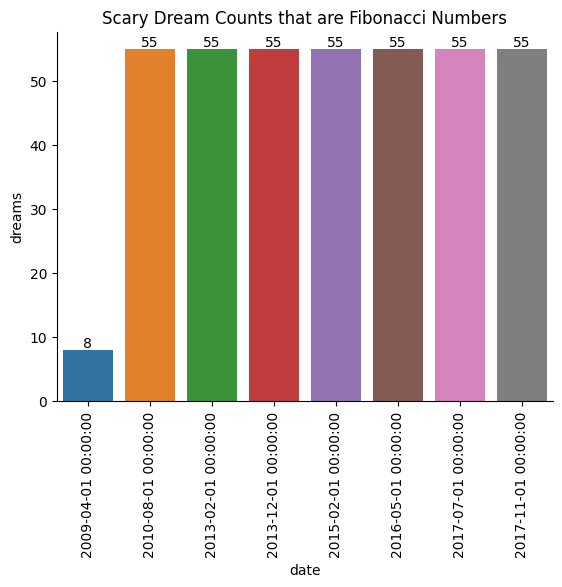

In [14]:
plt_fib = sns.barplot(data=df_dreams_fib, x='date', y='dreams')
plt_fib.set_xticklabels(df_dreams_fib.date, rotation=90)
plt_fib.set(title='Scary Dream Counts that are Fibonacci Numbers')
for label in plt_fib.containers:
  plt_fib.bar_label(label,)
sns.despine()

#Now that we have some interesting groupings and findings, let's create a 4-plot visual

<IPython.core.display.Javascript object>

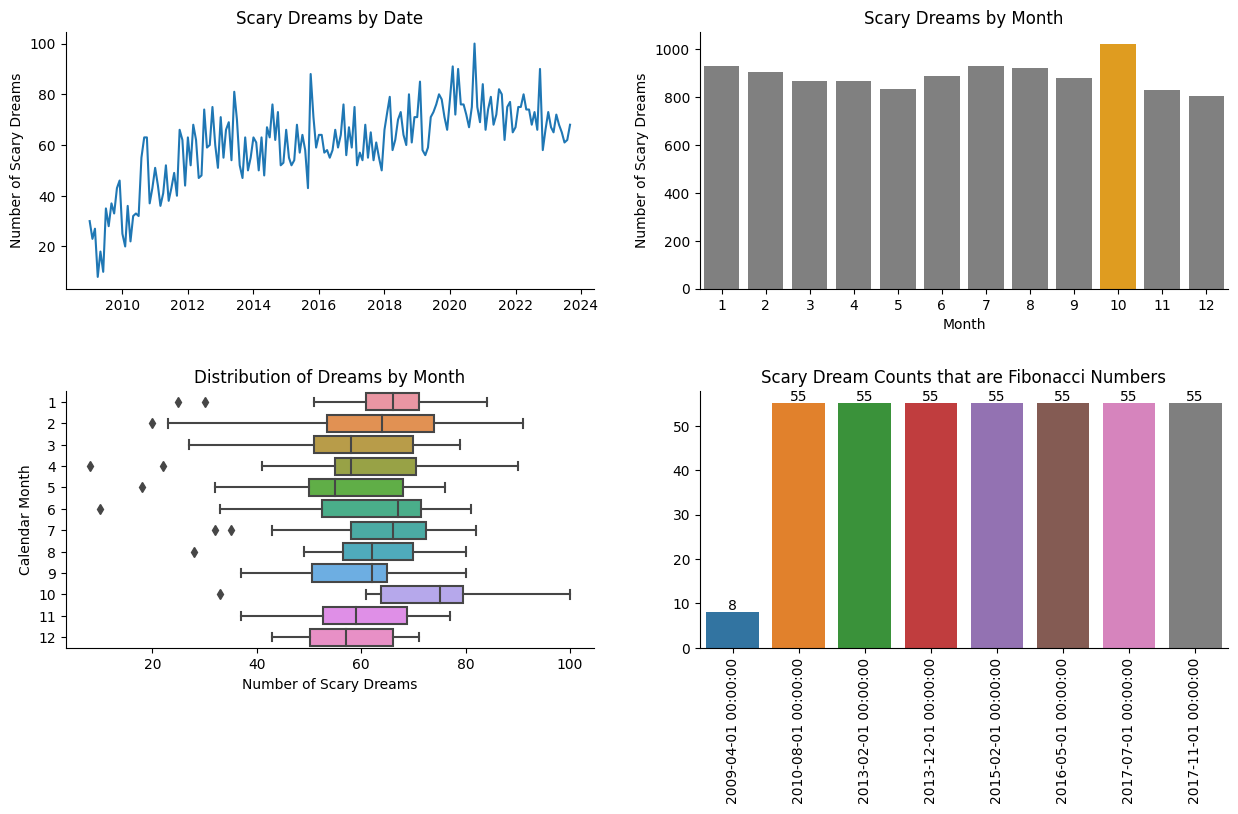

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(15,8))
plt.subplots_adjust(hspace = 0.4)

sns.lineplot(data=df_dreams, x='date', y='dreams', ax=axes[0,0]).set(title='Scary Dreams by Date', xlabel=None, ylabel ='Number of Scary Dreams')
sns.barplot(data=dreams_monthly, x='month', y='dreams', ax=axes[0,1], palette=['grey' if (x < max(dreams_monthly['dreams'])) else 'orange' for x in dreams_monthly['dreams']]).set(title='Scary Dreams by Month', xlabel='Month', ylabel='Number of Scary Dreams');
sns.boxplot(data=df_dreams, x='dreams', y='month', orient='h', ax=axes[1,0]).set(title='Distribution of Dreams by Month', xlabel='Number of Scary Dreams', ylabel='Calendar Month')
plt_fib = sns.barplot(data=df_dreams_fib, x='date', y='dreams', ax=axes[1,1])
plt_fib.set_xticklabels(df_dreams_fib.date, rotation=90)
plt_fib.set(title='Scary Dream Counts that are Fibonacci Numbers', xlabel=None, ylabel=None)
for label in plt_fib.containers:
  plt_fib.bar_label(label,)
sns.despine()
fig.show()

#Let's create a facet grid to show the data, since we have two time-based columns - year and month

<IPython.core.display.Javascript object>

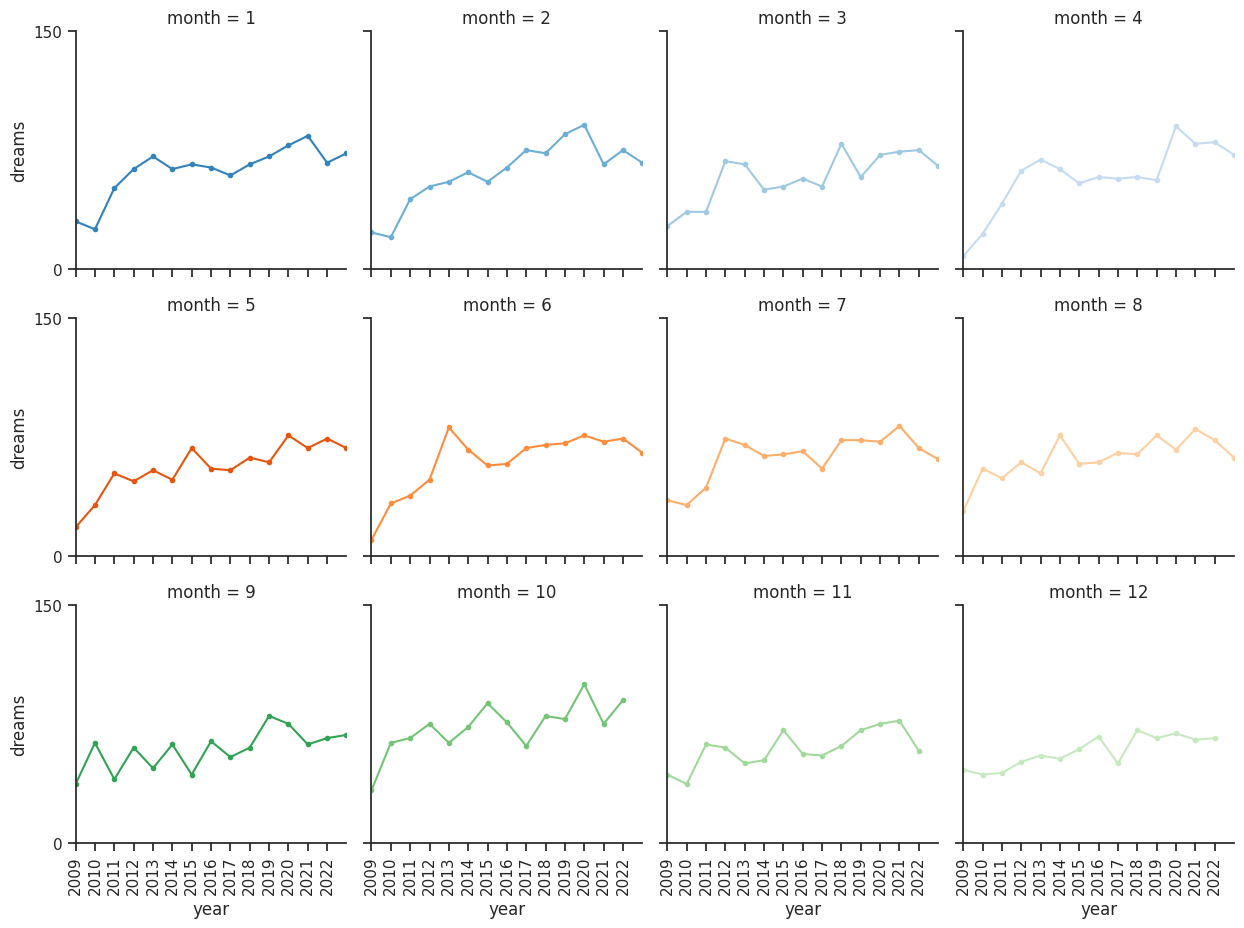

In [16]:
sns.set_theme(style="ticks")

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df_dreams, col="month", hue="month", palette="tab20c", col_wrap=4, height=3.15)

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "year", "dreams", marker=".")

# Adjust the tick positions and labels
#
grid.set(xticks=np.arange(2009,2023,1), yticks=[0,150], xlim=(2009,2023), ylim=(0, 150))
grid.set_xticklabels(np.arange(2009,2023,1), rotation=90)

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

#From the visuals it doesn't look like simple linear regression will be able to accurately predict the future number of dreams but let's give it a try anyway

In [17]:
# start prediction work

<IPython.core.display.Javascript object>

In [18]:
df_dreams.head()

<IPython.core.display.Javascript object>

,date,year,month,dreams
0,2009-01-01,2009,1,30
1,2009-02-01,2009,2,23
2,2009-03-01,2009,3,27
3,2009-04-01,2009,4,8
4,2009-05-01,2009,5,18


In [19]:
# turn the date into a continuous variable
df_dreams['date_cont'] = df_dreams.date.astype(int)/10**11
df_dreams

<IPython.core.display.Javascript object>

,date,year,month,dreams,date_cont
0,2009-01-01,2009,1,30,12307680.0
1,2009-02-01,2009,2,23,12334464.0
2,2009-03-01,2009,3,27,12358656.0
3,2009-04-01,2009,4,8,12385440.0
4,2009-05-01,2009,5,18,12411360.0
...,...,...,...,...,...
172,2023-05-01,2023,5,68,16828992.0
173,2023-06-01,2023,6,65,16855776.0
174,2023-07-01,2023,7,61,16881696.0
175,2023-08-01,2023,8,62,16908480.0


In [20]:
# create the training and testing datasets
dreams_train_df = df_dreams.sample(frac=0.8, random_state=42)
dreams_test_df = df_dreams.drop(dreams_train_df.index)
print("training data shape: ", dreams_train_df.shape)
print("testing data shape: ", dreams_test_df.shape)

<IPython.core.display.Javascript object>

training data shape:  (142, 5)
testing data shape:  (35, 5)


<IPython.core.display.Javascript object>

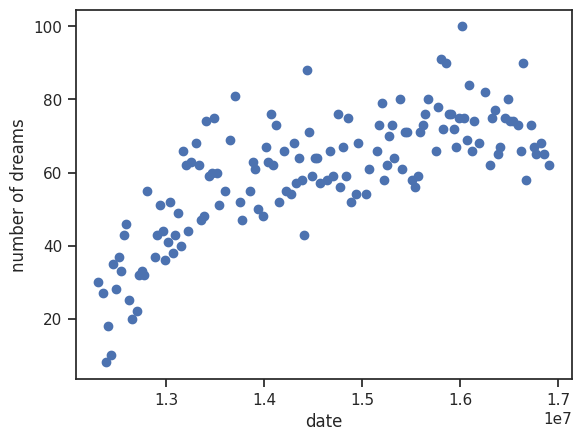

In [21]:
# create a basic plot of the data
plt.scatter(dreams_train_df.date_cont, dreams_train_df.dreams)
plt.xlabel('date')
plt.ylabel('number of dreams')
plt.show()

In [22]:
# set the variables for the Ordinary Least Squares process
x_train = dreams_train_df.date_cont
y_train = dreams_train_df.dreams

<IPython.core.display.Javascript object>

In [23]:
# run the OLS on our data
model_dreams = stats.OLS(y_train, x_train)
results_dreams = model_dreams.fit()

<IPython.core.display.Javascript object>

In [24]:
# view the results of the OLS regression
print(results_dreams.summary())

<IPython.core.display.Javascript object>

                                 OLS Regression Results                                
Dep. Variable:                 dreams   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              3021.
Date:                Thu, 26 Oct 2023   Prob (F-statistic):                    4.02e-97
Time:                        15:11:39   Log-Likelihood:                         -567.21
No. Observations:                 142   AIC:                                      1136.
Df Residuals:                     141   BIC:                                      1139.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
date_coeff = results_dreams.params[0]
ssr_dreams = results_dreams.ssr

print("date coefficient: ", date_coeff)
print("sum of square residuals: ", ssr_dreams)

<IPython.core.display.Javascript object>

date coefficient:  4.156352264869282e-06
sum of square residuals:  24509.681202932035


<IPython.core.display.Javascript object>

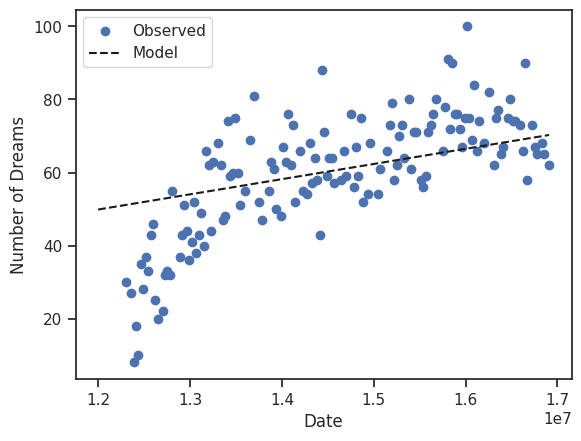

In [26]:
# plot the model's line against the observed data
x_synthetic = np.linspace(12000000,dreams_train_df.date_cont.max(), 50)
y_pred_dreams = date_coeff*x_synthetic + 0 #intercept is zero
plt.scatter(dreams_train_df.date_cont, dreams_train_df.dreams, label='Observed')
plt.plot(x_synthetic, y_pred_dreams, color='k', ls='--', label='Model')
plt.xlabel('Date')
plt.ylabel('Number of Dreams')
plt.legend()
plt.show()

#The basic OLS linear regression is not useful based on the visual above, but let's run the model against the testing data

In [27]:
x_test = dreams_test_df.date_cont
y_test = dreams_test_df.dreams

<IPython.core.display.Javascript object>

In [28]:
test_predictions = results_dreams.predict(x_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

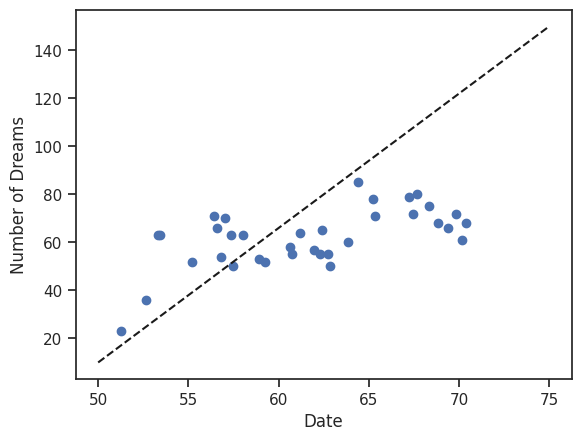

In [29]:
plt.scatter(test_predictions, y_test)
plt.plot([50, 75], [10, 150], c='k', ls='--')
plt.xlabel('Date')
plt.ylabel('Number of Dreams')
plt.show();

#Basic linear regression with untransformed data does not offer us any good predictions. Let's try some transformations of the data.

<IPython.core.display.Javascript object>

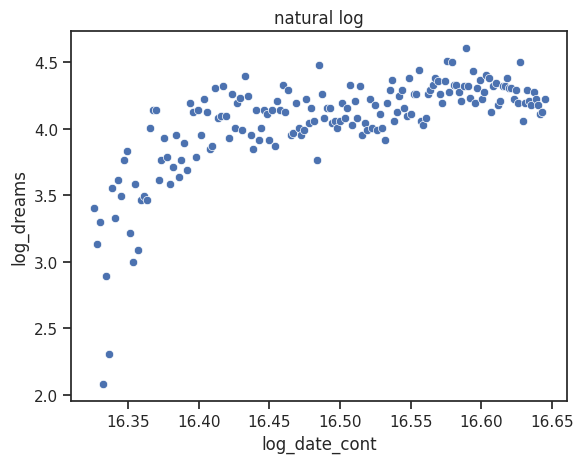

In [30]:
df_dreams['log_dreams'] = np.log(df_dreams.dreams)
df_dreams['log_date_cont'] = np.log(df_dreams.date_cont)
plt_log = sns.scatterplot(data=df_dreams, x='log_date_cont', y='log_dreams').set(title='natural log')

#Not much change with a natural log, let's try a few others

In [31]:
df_dreams['log_10_dreams'] = np.log10(df_dreams.dreams)
df_dreams['log_10_date_cont'] = np.log10(df_dreams.dreams)

<IPython.core.display.Javascript object>

In [32]:
df_dreams['sqrt_dreams'] = np.sqrt(df_dreams.dreams)
df_dreams['sqrt_date_cont'] = np.sqrt(df_dreams.dreams)

<IPython.core.display.Javascript object>

In [33]:
df_dreams['cbrt_dreams'] = np.cbrt(df_dreams.dreams)
df_dreams['cbrt_date_cont'] = np.cbrt(df_dreams.dreams)

<IPython.core.display.Javascript object>

In [34]:
df_dreams['power2_dreams'] = np.power(df_dreams.dreams,2)
df_dreams['power2_date_cont'] = np.power(df_dreams.dreams,2)

<IPython.core.display.Javascript object>

#Let's plot the results on a visual together

<IPython.core.display.Javascript object>

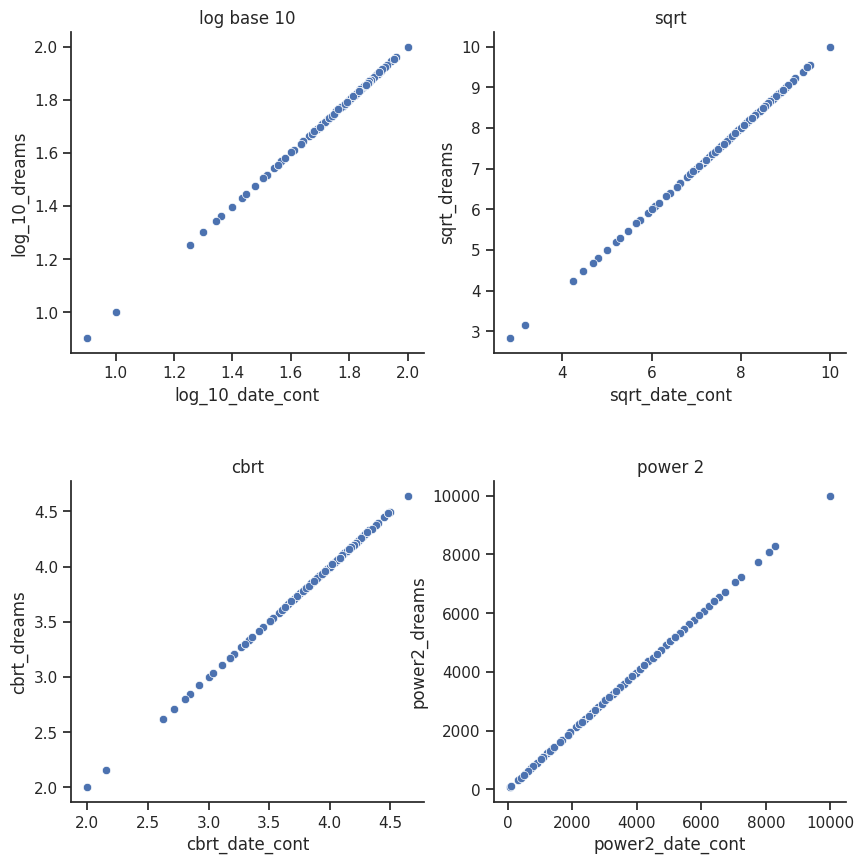

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(hspace = 0.4)

plt_log10 = sns.scatterplot(data=df_dreams, x='log_10_date_cont', y='log_10_dreams', ax=axes[0,0]).set(title='log base 10')
plt_sqrt = sns.scatterplot(data=df_dreams, x='sqrt_date_cont', y='sqrt_dreams', ax=axes[0,1]).set(title='sqrt')
plt_cbrt = sns.scatterplot(data=df_dreams, x='cbrt_date_cont', y='cbrt_dreams', ax=axes[1,0]).set(title='cbrt')
plt_pwr2 = sns.scatterplot(data=df_dreams, x='power2_date_cont', y='power2_dreams', ax=axes[1,1]).set(title='power 2')
sns.despine()
fig.show()

#Those methods had a good effect. We need to choose one. Let's check the distribution of dreams for each.

<IPython.core.display.Javascript object>

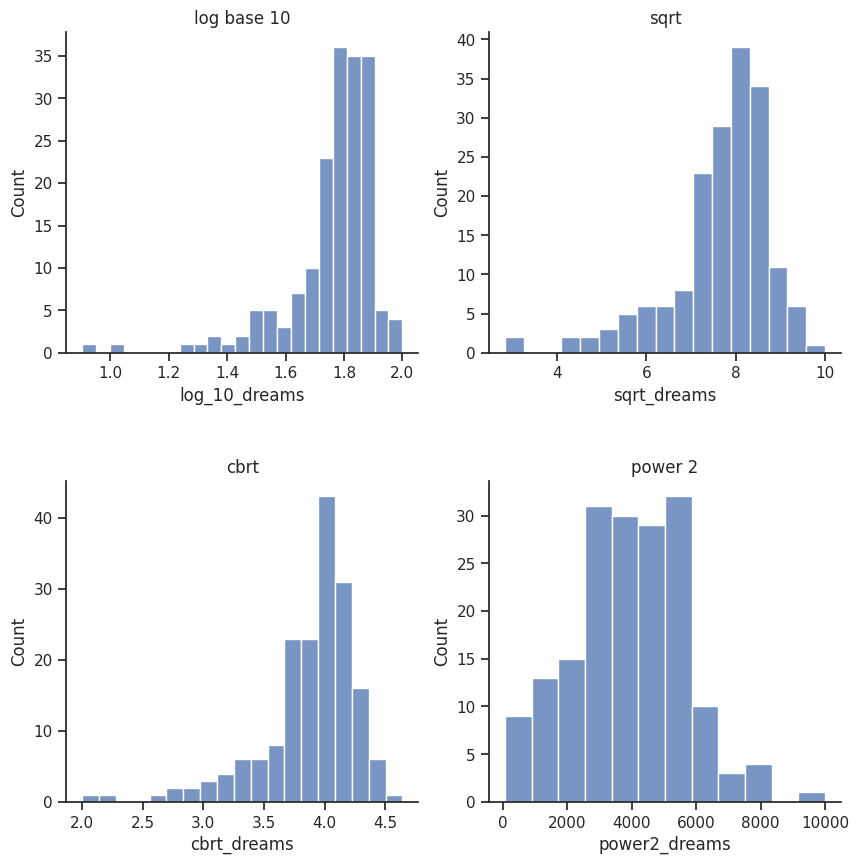

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(hspace = 0.4)

plt_log10 = sns.histplot(data=df_dreams, x='log_10_dreams', ax=axes[0,0]).set(title='log base 10')
plt_sqrt = sns.histplot(data=df_dreams, x='sqrt_dreams', ax=axes[0,1]).set(title='sqrt')
plt_cbrt = sns.histplot(data=df_dreams, x='cbrt_dreams', ax=axes[1,0]).set(title='cbrt')
plt_pwr2 = sns.histplot(data=df_dreams, x='power2_dreams', ax=axes[1,1]).set(title='power 2')
sns.despine()
fig.show()

#It looks like the power of 2 transformation leads to the most normal distribution. Let's check the skew to make sure it's feasible to use.

In [37]:
df_dreams[['log_10_dreams','sqrt_dreams','cbrt_dreams','power2_dreams']].skew()

<IPython.core.display.Javascript object>

log_10_dreams   -2.398771
sqrt_dreams     -1.427614
cbrt_dreams     -1.705338
power2_dreams    0.148916
dtype: float64

#The power of 2 transformation provides a feasible low-moderately positive skew to the data. The other transformations aren't really useable.

#Let's move forward with the power of 2

In [38]:
# prepare the variables for predictions
X = df_dreams['power2_date_cont']
y = df_dreams['power2_dreams']

<IPython.core.display.Javascript object>

In [39]:
# add a constant for the date
X = stats.add_constant(X)

<IPython.core.display.Javascript object>

In [40]:
# fit the model and print a summary
model = stats.OLS(y, X).fit()

# Model Summary
model_summary = model.summary()
print(model_summary)

<IPython.core.display.Javascript object>

                            OLS Regression Results                            
Dep. Variable:          power2_dreams   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.578e+32
Date:                Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                        15:11:42   Log-Likelihood:                 4529.7
No. Observations:                 177   AIC:                            -9055.
Df Residuals:                     175   BIC:                            -9049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.276e-12   3.41e-13  

<IPython.core.display.Javascript object>

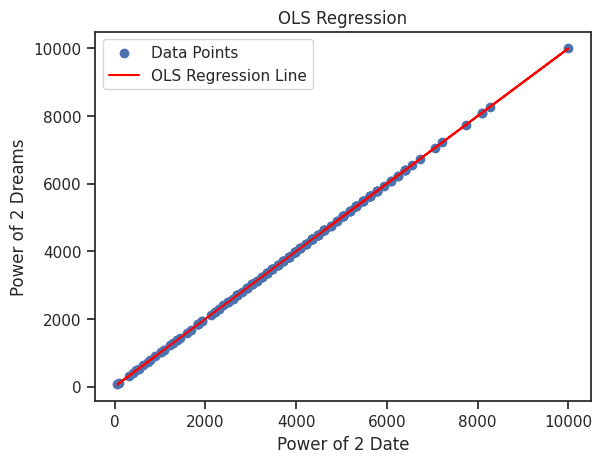

In [41]:
# visualize the model
plt.scatter(df_dreams['power2_date_cont'], df_dreams['power2_dreams'], label='Data Points')
plt.plot(df_dreams['power2_date_cont'], model.fittedvalues, color='red', label='OLS Regression Line')
plt.xlabel('Power of 2 Date')
plt.ylabel('Power of 2 Dreams')
plt.title('OLS Regression')
plt.legend()
plt.show()

#This seems to good to be true. Since we only have one independent variable, date_cont, we may need to rework how the datetime64[ns] type was transformed into a continuous variable.

In [42]:
# View existing date transformation
df_dreams[['date','date_cont']].head()

<IPython.core.display.Javascript object>

,date,date_cont
0,2009-01-01,12307680.0
1,2009-02-01,12334464.0
2,2009-03-01,12358656.0
3,2009-04-01,12385440.0
4,2009-05-01,12411360.0


In [43]:
# Rework into a count of days since the first day of the dataset
df_dreams['days_since_start'] = (df_dreams['date'] - df_dreams['date'].min()).dt.days
df_dreams[['date','date_cont','days_since_start']].head()

<IPython.core.display.Javascript object>

,date,date_cont,days_since_start
0,2009-01-01,12307680.0,0
1,2009-02-01,12334464.0,31
2,2009-03-01,12358656.0,59
3,2009-04-01,12385440.0,90
4,2009-05-01,12411360.0,120


<IPython.core.display.Javascript object>

<Axes: xlabel='days_since_start', ylabel='dreams'>

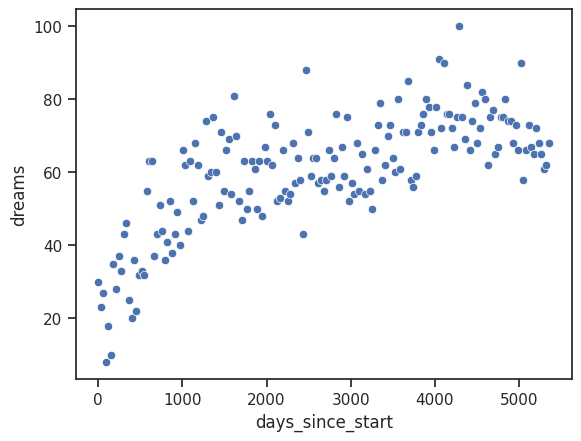

In [44]:
# Plot the results to make sure it looks the same as before
sns.scatterplot(data=df_dreams, x='days_since_start', y='dreams')

<IPython.core.display.Javascript object>

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


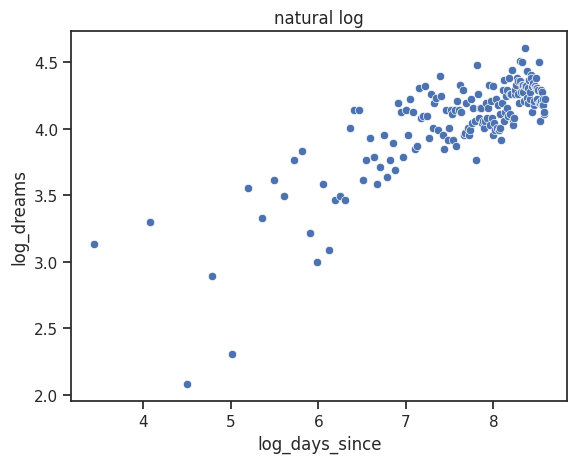

In [45]:
# New continuous date column looks good; let's do all the transformations on it and plot them
df_dreams['log_days_since'] = np.log(df_dreams.days_since_start)
df_dreams['log10_days_since'] = np.log10(df_dreams.days_since_start)
df_dreams['sqrt_days_since'] = np.sqrt(df_dreams.days_since_start)
df_dreams['cbrt_days_since'] = np.cbrt(df_dreams.days_since_start)
df_dreams['power2_days_since'] = np.power(df_dreams.days_since_start, 2)

# Start with natural log plot
sns.scatterplot(data=df_dreams, x='log_days_since', y='log_dreams').set(title='natural log');

<IPython.core.display.Javascript object>

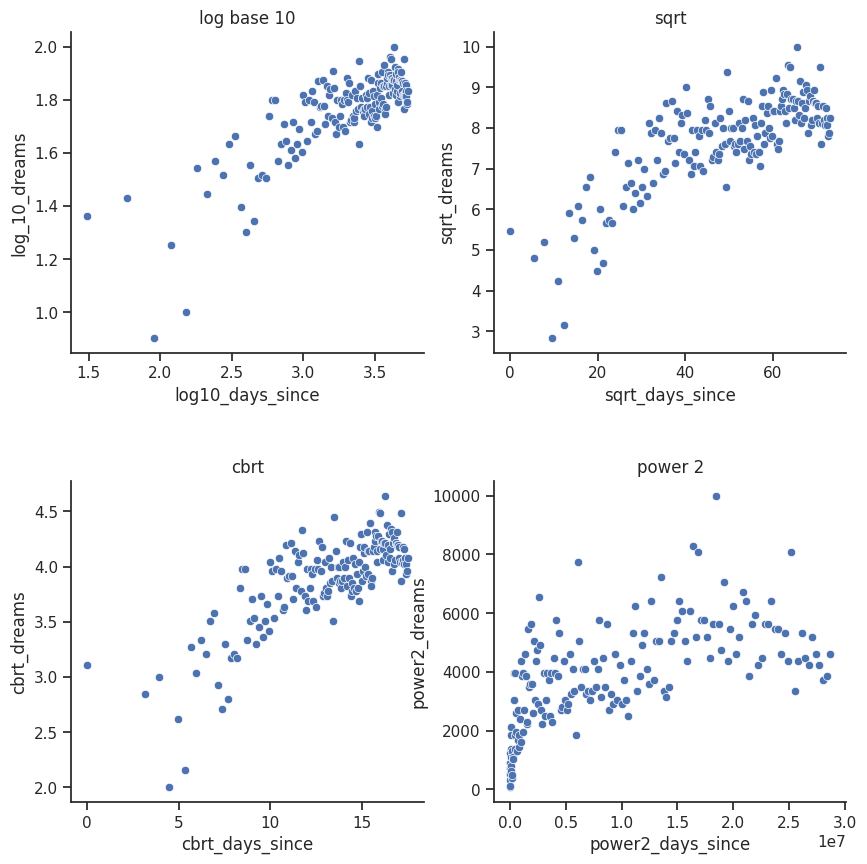

In [46]:
# Plot the different transformations
fig, axes = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(hspace = 0.4)

plt_log10 = sns.scatterplot(data=df_dreams, x='log10_days_since', y='log_10_dreams', ax=axes[0,0]).set(title='log base 10')
plt_sqrt = sns.scatterplot(data=df_dreams, x='sqrt_days_since', y='sqrt_dreams', ax=axes[0,1]).set(title='sqrt')
plt_cbrt = sns.scatterplot(data=df_dreams, x='cbrt_days_since', y='cbrt_dreams', ax=axes[1,0]).set(title='cbrt')
plt_pwr2 = sns.scatterplot(data=df_dreams, x='power2_days_since', y='power2_dreams', ax=axes[1,1]).set(title='power 2')
sns.despine()
fig.show()

In [47]:
# The plots above don't appear to be good for a linear model

# Look at doing the regression per month instead, focus on October
df_dreams.head()

<IPython.core.display.Javascript object>

,date,year,month,dreams,date_cont,log_dreams,log_date_cont,log_10_dreams,log_10_date_cont,sqrt_dreams,...,cbrt_dreams,cbrt_date_cont,power2_dreams,power2_date_cont,days_since_start,log_days_since,log10_days_since,sqrt_days_since,cbrt_days_since,power2_days_since
0,2009-01-01,2009,1,30,12307680.0,3.401197,16.325734,1.477121,1.477121,5.477226,...,3.107233,3.107233,900,900,0,-inf,-inf,0.000000,0.000000,0
1,2009-02-01,2009,2,23,12334464.0,3.135494,16.327908,1.361728,1.361728,4.795832,...,2.843867,2.843867,529,529,31,3.433987,1.491362,5.567764,3.141381,961
2,2009-03-01,2009,3,27,12358656.0,3.295837,16.329867,1.431364,1.431364,5.196152,...,3.000000,3.000000,729,729,59,4.077537,1.770852,7.681146,3.892996,3481
3,2009-04-01,2009,4,8,12385440.0,2.079442,16.332032,0.903090,0.903090,2.828427,...,2.000000,2.000000,64,64,90,4.499810,1.954243,9.486833,4.481405,8100
4,2009-05-01,2009,5,18,12411360.0,2.890372,16.334123,1.255273,1.255273,4.242641,...,2.620741,2.620741,324,324,120,4.787492,2.079181,10.954451,4.932424,14400


In [78]:
df_dreams_10 = df_dreams[df_dreams.month == 10].reset_index(drop=True)
df_dreams_10

<IPython.core.display.Javascript object>

,date,year,month,dreams,date_cont,log_dreams,log_date_cont,log_10_dreams,log_10_date_cont,sqrt_dreams,...,cbrt_dreams,cbrt_date_cont,power2_dreams,power2_date_cont,days_since_start,log_days_since,log10_days_since,sqrt_days_since,cbrt_days_since,power2_days_since
0,2009-10-01,2009,10,33,12543552.0,3.496508,16.344717,1.518514,1.518514,5.744563,...,3.207534,3.207534,1089,1089,273,5.609472,2.436163,16.522712,6.487154,74529
1,2010-10-01,2010,10,63,12858912.0,4.143135,16.369548,1.799341,1.799341,7.937254,...,3.979057,3.979057,3969,3969,638,6.458338,2.804821,25.258662,8.608753,407044
2,2011-10-01,2011,10,66,13174272.0,4.189655,16.393776,1.819544,1.819544,8.124038,...,4.041240,4.041240,4356,4356,1003,6.910751,3.001301,31.670175,10.009990,1006009
3,2012-10-01,2012,10,75,13490496.0,4.317488,16.417496,1.875061,1.875061,8.660254,...,4.217163,4.217163,5625,5625,1369,7.221836,3.136403,37.000000,11.103702,1874161
4,2013-10-01,2013,10,63,13805856.0,4.143135,16.440603,1.799341,1.799341,7.937254,...,3.979057,3.979057,3969,3969,1734,7.458186,3.239049,41.641326,12.013873,3006756
5,2014-10-01,2014,10,73,14121216.0,4.290459,16.463189,1.863323,1.863323,8.544004,...,4.179339,4.179339,5329,5329,2099,7.649216,3.322012,45.814845,12.803759,4405801
6,2015-10-01,2015,10,88,14436576.0,4.477337,16.485276,1.944483,1.944483,9.380832,...,4.447960,4.447960,7744,7744,2464,7.809541,3.391641,49.638695,13.506627,6071296
7,2016-10-01,2016,10,76,14752800.0,4.330733,16.506943,1.880814,1.880814,8.717798,...,4.235824,4.235824,5776,5776,2830,7.948032,3.451786,53.197744,14.144757,8008900
8,2017-10-01,2017,10,61,15068160.0,4.110874,16.528094,1.785330,1.785330,7.810250,...,3.936497,3.936497,3721,3721,3195,8.069342,3.504471,56.524331,14.728447,10208025
9,2018-10-01,2018,10,80,15383520.0,4.382027,16.548807,1.903090,1.903090,8.944272,...,4.308869,4.308869,6400,6400,3560,8.177516,3.551450,59.665736,15.269213,12673600


<IPython.core.display.Javascript object>

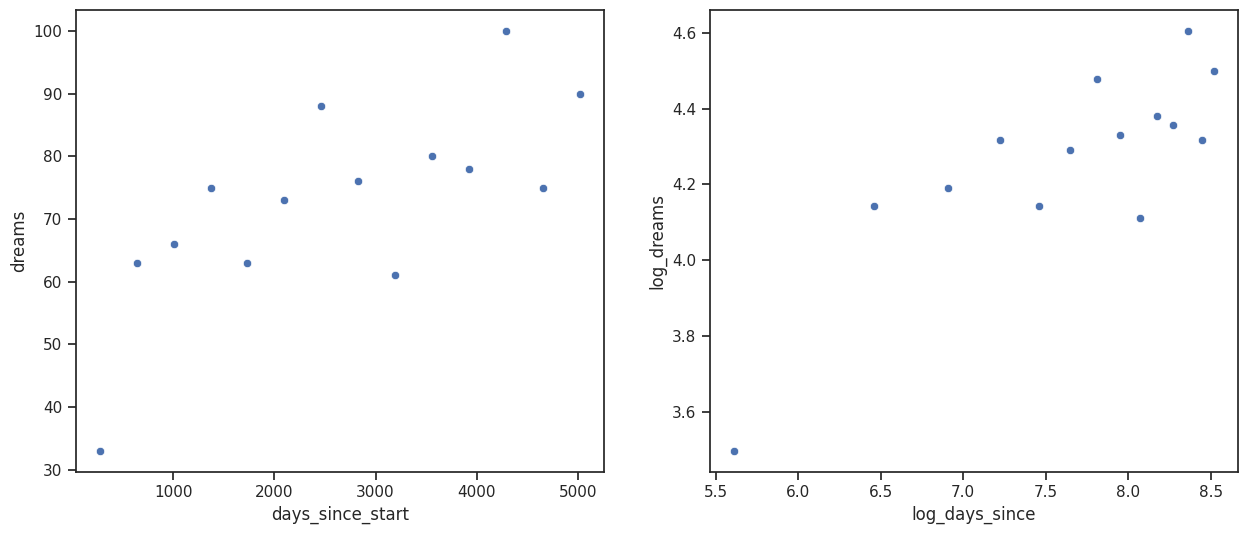

In [64]:
# Plot October's data
fig, axes = plt.subplots(1, 2, figsize=(15,6))
plt.subplots_adjust(hspace=0.4)
sns.scatterplot(data=df_dreams_10, x='days_since_start', y='dreams', ax=axes[0])
sns.scatterplot(data=df_dreams_10, x='log_days_since', y='log_dreams', ax=axes[1])
plt.show();

<IPython.core.display.Javascript object>

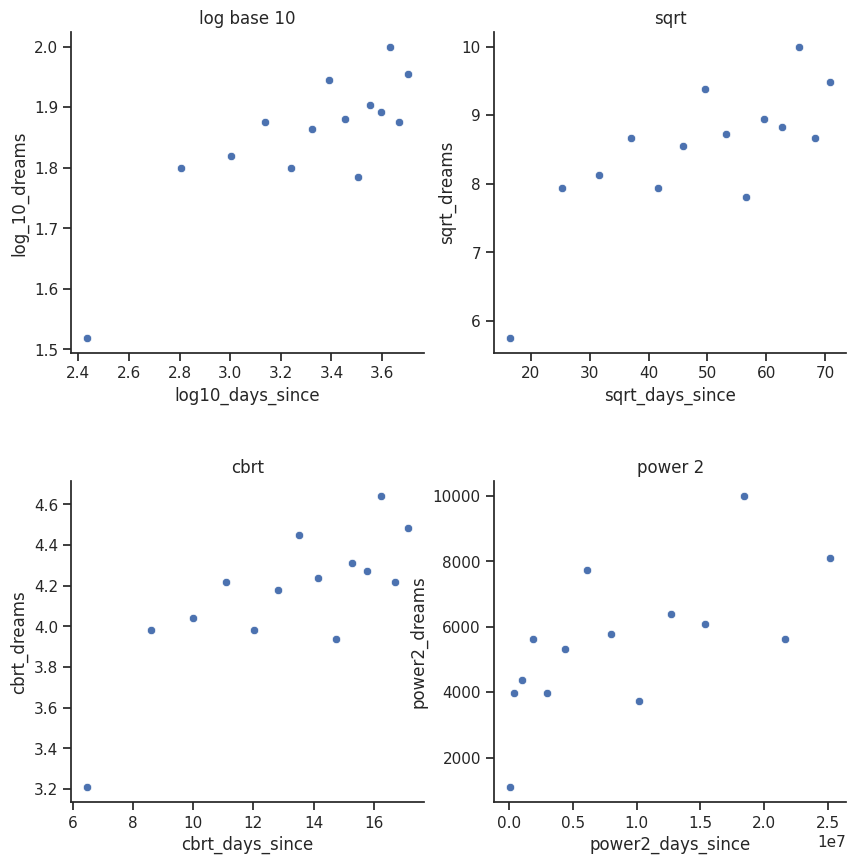

In [53]:
# Additional looks at October data

fig, axes = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(hspace = 0.4)

plt_log10 = sns.scatterplot(data=df_dreams_10, x='log10_days_since', y='log_10_dreams', ax=axes[0,0]).set(title='log base 10')
plt_sqrt = sns.scatterplot(data=df_dreams_10, x='sqrt_days_since', y='sqrt_dreams', ax=axes[0,1]).set(title='sqrt')
plt_cbrt = sns.scatterplot(data=df_dreams_10, x='cbrt_days_since', y='cbrt_dreams', ax=axes[1,0]).set(title='cbrt')
plt_pwr2 = sns.scatterplot(data=df_dreams_10, x='power2_days_since', y='power2_dreams', ax=axes[1,1]).set(title='power 2')
sns.despine()
fig.show()

<IPython.core.display.Javascript object>

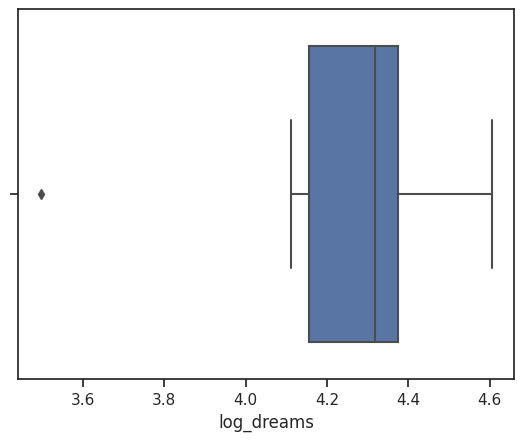

In [70]:
# Natural log looks reasonable; check the outliers
sns.boxplot(data=df_dreams_10, x='log_dreams', orient='h');

In [79]:
# Compute the z-scores for the 'log_dreams' column
z_scores = stats.zscore(df_dreams_10['log_dreams'])

# Define a threshold for outliers (e.g., 2 or 3 standard deviations)
threshold = 3

# Identify outliers based on the z-scores
outliers = (abs(z_scores) > threshold)

# Get the indices of the outliers
outlier_indices = df_dreams_10[outliers].index

# Print the indices of the outliers
print("Indices of the outliers:", outlier_indices)

<IPython.core.display.Javascript object>

Indices of the outliers: Int64Index([0], dtype='int64')


In [80]:
# Remove the outlier
df_dreams_10.drop(0, inplace=True)
df_dreams_10

<IPython.core.display.Javascript object>

,date,year,month,dreams,date_cont,log_dreams,log_date_cont,log_10_dreams,log_10_date_cont,sqrt_dreams,...,cbrt_dreams,cbrt_date_cont,power2_dreams,power2_date_cont,days_since_start,log_days_since,log10_days_since,sqrt_days_since,cbrt_days_since,power2_days_since
1,2010-10-01,2010,10,63,12858912.0,4.143135,16.369548,1.799341,1.799341,7.937254,...,3.979057,3.979057,3969,3969,638,6.458338,2.804821,25.258662,8.608753,407044
2,2011-10-01,2011,10,66,13174272.0,4.189655,16.393776,1.819544,1.819544,8.124038,...,4.041240,4.041240,4356,4356,1003,6.910751,3.001301,31.670175,10.009990,1006009
3,2012-10-01,2012,10,75,13490496.0,4.317488,16.417496,1.875061,1.875061,8.660254,...,4.217163,4.217163,5625,5625,1369,7.221836,3.136403,37.000000,11.103702,1874161
4,2013-10-01,2013,10,63,13805856.0,4.143135,16.440603,1.799341,1.799341,7.937254,...,3.979057,3.979057,3969,3969,1734,7.458186,3.239049,41.641326,12.013873,3006756
5,2014-10-01,2014,10,73,14121216.0,4.290459,16.463189,1.863323,1.863323,8.544004,...,4.179339,4.179339,5329,5329,2099,7.649216,3.322012,45.814845,12.803759,4405801
6,2015-10-01,2015,10,88,14436576.0,4.477337,16.485276,1.944483,1.944483,9.380832,...,4.447960,4.447960,7744,7744,2464,7.809541,3.391641,49.638695,13.506627,6071296
7,2016-10-01,2016,10,76,14752800.0,4.330733,16.506943,1.880814,1.880814,8.717798,...,4.235824,4.235824,5776,5776,2830,7.948032,3.451786,53.197744,14.144757,8008900
8,2017-10-01,2017,10,61,15068160.0,4.110874,16.528094,1.785330,1.785330,7.810250,...,3.936497,3.936497,3721,3721,3195,8.069342,3.504471,56.524331,14.728447,10208025
9,2018-10-01,2018,10,80,15383520.0,4.382027,16.548807,1.903090,1.903090,8.944272,...,4.308869,4.308869,6400,6400,3560,8.177516,3.551450,59.665736,15.269213,12673600
10,2019-10-01,2019,10,78,15698880.0,4.356709,16.569100,1.892095,1.892095,8.831761,...,4.272659,4.272659,6084,6084,3925,8.275122,3.593840,62.649820,15.774171,15405625


<IPython.core.display.Javascript object>

<Axes: xlabel='log_days_since', ylabel='log_dreams'>

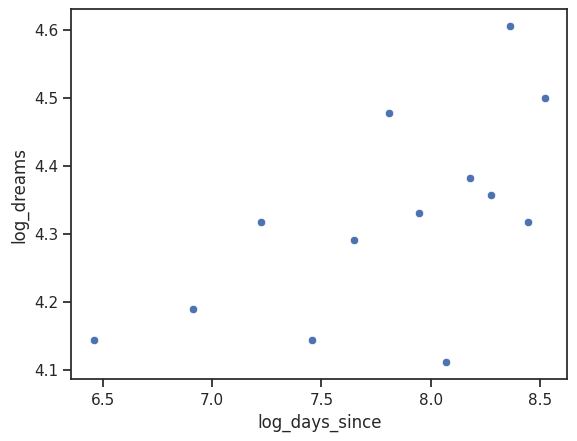

In [81]:
sns.scatterplot(data=df_dreams_10, x='log_days_since', y='log_dreams')

In [84]:
# Try the OLS regression again

# Step 1: Extract the independent (X) and dependent (y) variables.
X = df_dreams_10['log_days_since']
y = df_dreams_10['log_dreams']

# Step 2: Add a constant (intercept) term to the independent variable.
X = sm.add_constant(X)

# Step 3: Fit the OLS regression model.
model = sm.OLS(y, X).fit()

# Step 4: Get a summary of the model.
model_summary = model.summary()
print(model_summary)

<IPython.core.display.Javascript object>

                            OLS Regression Results                            
Dep. Variable:             log_dreams   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     6.694
Date:                Thu, 26 Oct 2023   Prob (F-statistic):             0.0253
Time:                        15:37:10   Log-Likelihood:                 9.8772
No. Observations:                  13   AIC:                            -15.75
Df Residuals:                      11   BIC:                            -14.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.1859      0.440      7.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<IPython.core.display.Javascript object>

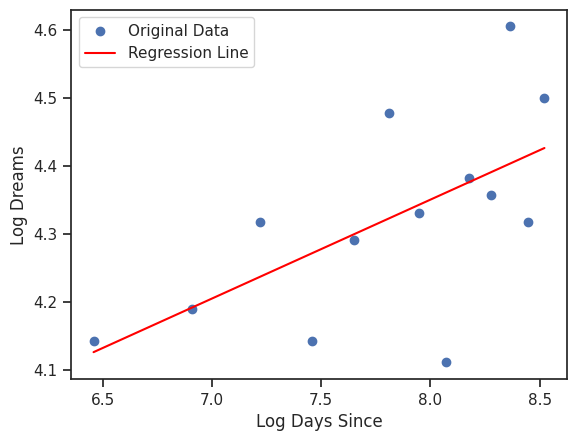

In [85]:
# Plot the comparison

# Get the regression coefficients.
intercept, slope = model.params['const'], model.params['log_days_since']

# Create a scatter plot of the original data.
plt.scatter(df_dreams_10['log_days_since'], df_dreams_10['log_dreams'], label='Original Data')

# Plot the regression line using the coefficients.
regression_line = intercept + slope * df_dreams_10['log_days_since']
plt.plot(df_dreams_10['log_days_since'], regression_line, color='red', label='Regression Line')

# Label axes and add a legend.
plt.xlabel('Log Days Since')
plt.ylabel('Log Dreams')
plt.legend()

# Show the plot.
plt.show()

#OLS regression may work if we break the data down by month, but this isn't ideal since we'd have to combine the numbers back together all based on different models. That concludes the work on this dataset.